In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('Mobiles.csv')
df

,manufacturer,model,form,smartphone,year,units_sold_m
0,Nokia,1100,Bar,No,2003,250.0
1,Nokia,1110,Bar,No,2005,247.5
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224.0
3,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200.0
4,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1
...,...,...,...,...,...,...
106,LG,G2,Touchscreen,Yes,2013,3.0
107,LeTV,LeEco Le 1s,Touchscreen,Yes,2016,3.0
108,Google,Pixel and Pixel XL,Touchscreen,Yes,2016,2.1
109,Palm,Centro,Keyboard bar,Yes,2007,2.0


In [3]:
df.head()

,manufacturer,model,form,smartphone,year,units_sold_m
0,Nokia,1100,Bar,No,2003,250.0
1,Nokia,1110,Bar,No,2005,247.5
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224.0
3,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200.0
4,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1


In [4]:
df.info

<bound method DataFrame.info of     manufacturer                         model          form smartphone  year  \
0          Nokia                          1100           Bar         No  2003   
1          Nokia                          1110           Bar         No  2005   
2          Apple    iPhone 6 and iPhone 6 Plus   Touchscreen        Yes  2014   
3          Nokia        105 (2013), 105 (2015)           Bar         No  2013   
4          Apple  iPhone 6S and iPhone 6S Plus   Touchscreen        Yes  2015   
..           ...                           ...           ...        ...   ...   
106           LG                            G2   Touchscreen        Yes  2013   
107         LeTV                   LeEco Le 1s   Touchscreen        Yes  2016   
108       Google            Pixel and Pixel XL   Touchscreen        Yes  2016   
109         Palm                        Centro  Keyboard bar        Yes  2007   
110        Nokia                           N97   Tilt slider        Yes  2009

In [5]:
df.describe()

,year,units_sold_m
count,111.000000,111.000000
mean,2011.864865,50.447748
std,6.147411,59.167349
min,1996.000000,2.000000
25%,2007.000000,10.000000
50%,2012.000000,24.200000
75%,2018.000000,60.000000
max,2021.000000,250.000000


In [6]:
print(df.isnull().sum())

manufacturer    0
model           0
form            0
smartphone      0
year            0
units_sold_m    0
dtype: int64


<Axes: >

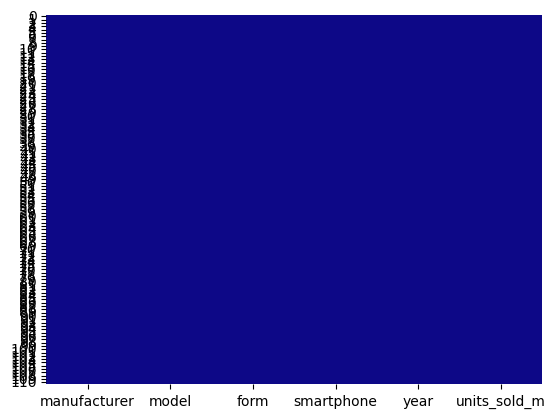

In [7]:
sns.heatmap(df.isnull(), yticklabels=True, cbar=False, cmap='plasma')

In [8]:
df.drop(['manufacturer','model','form'],axis=1,inplace=True)

In [9]:
df.smartphone=[1 if value=='Yes' else 0 for value in df.smartphone]

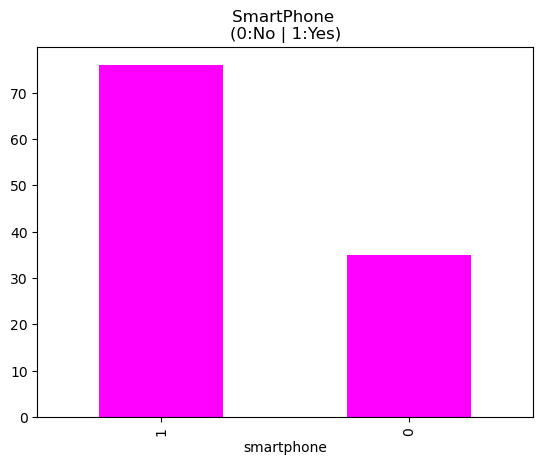

In [10]:
# turn the target variable into categorical data
df['smartphone'] = df['smartphone'].astype('category',copy=False)
plot = df['smartphone'].value_counts().plot(kind='bar',color='magenta', title="SmartPhone \n(0:No | 1:Yes)")
fig = plot.get_figure()

In [11]:
y = df["smartphone"] # our target variable
x = df.drop(["smartphone"], axis=1) # our predictors

In [12]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=0)

In [19]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)
# Predict the target variable on the test data
y_pred = classifier.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.95      0.84      0.89        25

    accuracy                           0.85        34
   macro avg       0.81      0.86      0.83        34
weighted avg       0.88      0.85      0.86        34



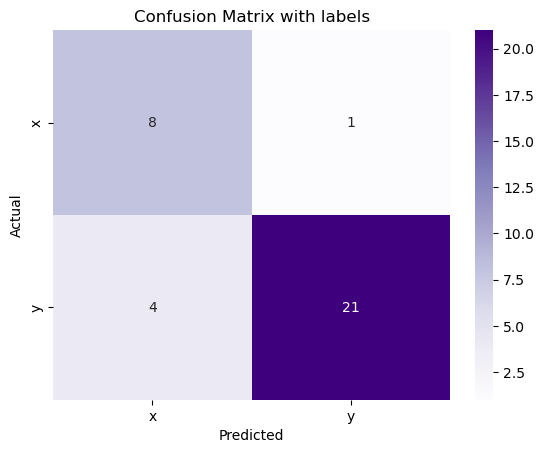

In [24]:
cm=confusion_matrix(y_test,y_pred)  #Ye line confusion matrix bana rahi hai jo ye batata hai:Model ne kitne bar sahi predict kiya.Kitne bar galat predict kiya
labels=['x','y']
sns.heatmap(cm,annot=True,fmt='d',cmap='Purples',xticklabels=labels,yticklabels=labels)   #Ye line matrix ko heatmap ke form mein draw kar rahi hai:
# annot=True → numbers matrix ke boxes ke andar likhe honge
# fmt='d' → numbers integer format mein honge
# cmap='Purples' → purple color ka heatmap use hoga
# xticklabels aur yticklabels → axis par class labels show honge
plt.title('Confusion Matrix with labels')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()